In [44]:
%load_ext autoreload
%autoreload 2
from stock_prediction.etl.ticker_data_extractors import load_cleaned_dataset
from stock_prediction.utils.series import get_normalized_nsteps_ahead_predictions_array
from stock_prediction.modeling.baselines import RollingGeometricAverage
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = load_cleaned_dataset()

In [3]:
df

,BIB,CSM,CURE,DDM,DSI,EPS,EQWL,EUSA,FAD,FAS,...,UXI,VIOG,VONE,VOO,VOOG,VOT,VTHR,XHE,XMMO,XSVM
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-17 00:00:00+00:00,-0.011295,0.001372,0.026144,0.007325,0.003181,0.003410,-0.000407,-0.011569,0.000000,0.022628,...,0.005441,-0.000308,0.004804,0.002750,0.003544,0.000313,0.003934,-0.000750,0.001381,-0.001273
2011-06-20 00:00:00+00:00,0.015136,0.006853,0.011720,0.012007,0.006977,0.004531,0.007326,0.001097,0.007812,0.001277,...,0.014568,0.000000,0.003585,0.005656,0.008577,0.006877,0.004430,0.006383,0.007356,0.008286
2011-06-21 00:00:00+00:00,0.019834,0.015314,0.019139,0.017714,0.010288,0.012855,0.011313,0.010961,0.022610,0.037824,...,0.033231,0.026852,0.013950,0.013633,0.014674,0.024216,0.016285,0.019026,0.019169,0.015803
2011-06-22 00:00:00+00:00,0.001931,-0.007374,-0.002965,-0.013300,-0.000623,-0.008907,-0.005593,0.009758,0.004106,-0.018018,...,-0.010522,0.007665,-0.005537,-0.005884,-0.006081,-0.004547,-0.003505,-0.004210,-0.002239,-0.002489
2011-06-23 00:00:00+00:00,0.005231,-0.008948,-0.044610,-0.008654,-0.019547,-0.008537,-0.004419,-0.018253,-0.001573,-0.028774,...,-0.004815,-0.008203,-0.006243,-0.003382,-0.004795,0.004111,-0.005863,-0.009559,-0.003142,-0.007486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-19 00:00:00+00:00,0.042752,0.010375,0.017413,0.011369,0.013165,0.007941,0.008465,0.008856,0.008635,0.016589,...,0.010816,0.007261,0.009756,0.009618,0.011969,0.009136,0.010784,0.004613,0.008625,0.005120
2024-08-20 00:00:00+00:00,-0.003442,-0.001738,0.011809,-0.002782,-0.002637,-0.002569,-0.002528,-0.005202,-0.004713,-0.010490,...,-0.004627,-0.010384,-0.002366,-0.001653,-0.000414,-0.006673,-0.002748,-0.013546,-0.008979,-0.016191
2024-08-21 00:00:00+00:00,0.010511,0.004273,0.005983,0.002121,0.003871,0.003949,0.003954,0.008062,0.009785,-0.003702,...,0.012202,0.014828,0.004032,0.003505,0.003786,0.010184,0.004701,0.011986,0.018811,0.013314


Baselines to try:
- Univariate: ARMA models per symbol sweeping over its hyperparameters p, q and fitting the best model per symbol. This can then also be used as features for a non-linear multivariate model.
- Multivariate: VARMA. Similarly this can be used as features.

The training approach will be TCV like. We hyperparameter tune on a first period of data by using  minimum initial window of e.g., 50% of the data and then fitting the model daily on up to 75% while performing daily forecasts n steps ahead. Then we casn choose the hyperparameters that e.g., minimize the average error on a 1 month window (if we are thinking of an investor who wants to decide the best time to buy or sell in a 1 month window). The last 25% can be used for testing with the final hyperparameters and to simulate a deployment.


In [4]:
df.reset_index()["Date"].describe()

count                                   3318
mean     2018-01-19 14:24:05.207956736+00:00
min                2011-06-17 00:00:00+00:00
25%                2014-10-03 18:00:00+00:00
50%                2018-01-20 12:00:00+00:00
75%                2021-05-06 18:00:00+00:00
max                2024-08-23 00:00:00+00:00
Name: Date, dtype: object

In [5]:
df.reset_index()["Date"].apply(lambda x: x.year).value_counts()

Date
2020    253
2014    252
2015    252
2016    252
2019    252
2013    252
2021    252
2022    251
2017    251
2018    251
2023    250
2012    250
2024    163
2011    137
Name: count, dtype: int64

## Data Splitting

To simulate a real life model development scenario and model deployment, we use:
- the first 60% of data for model selection (including hyperparameter search) using temporal cross validation. From those 60% we will use:
   - the first 30% always included in training
   - for the remaining 30%, at time $t$ we use all data before t to fit the model and then predict and evaluate on the next days. We are forecasting for an investor that wants to have a decent forecast over the next 1 month period to chose which symbols to buy or sell, not necessarily very precise, but capturing the main features of the evolution of the price. Thus:
     - We fit the series using the (V)ARIMA error structure
     - We predict for all days in the next N = 20 business days (this also means that we can only train up to before the last N=20 days)
     - We compute the MAE for the returns forecast for those N=20 days and take that as the performance value at time t. 
     - We shift to $t+1, ...$ repeat train + predict until we covered all the model selection data, and average the metric values to represent how good the model+hyperparameters combination is.
   - The procedure is repeated for each model+hyperparameter combination. The best model is the one with the lowest metric value.
- The next 40% of data are used for testing to get an unbiased estimate of performance with the best model selected. 
- When we deploy the app on AWS, the model will be retrained by extracting data daily at a pre-specified time, generate the forecasts and refresh the dashboard with the predictions.



## Planning

* experiment in this notebook a few (V)ARMA models. Things to start packaging:
  * data splitting code
  * target evaluation metric code
  * stepper to train and evaluate in a TCV manner
* develop generic HPT code based on my previous code and optuna
* run HPT experiments for baselines and organize the results in the notebook and eventually in the report.
* develop dataset containing best (V)ARMA forecasts and additional features
* HPT models based on that dataset (LighGBM, Feedforwad, minRNNs with just the series values)
* Develop app:
   * Script for daily retrain & prediction
   * Script for app that displays the results
   * Set up AWS service

## Data splitting

In [6]:
n_samples_train = int(df.shape[0] * 0.6)
n_samples_test = df.shape[0] - n_samples_train
df_train = df.sort_index(ascending=True).head(n_samples_train)
df_test = df.sort_index(ascending=True).tail(n_samples_test)

## Rolling Geometric Average baseline & Metrics definition

In [223]:
w_size = 20
# We want to use at least half of the training data to fit
# the model on each TCV step so here we define the range on
# which to predict. Note that we also reject the last w_size
# points because we compute our prediction error on the w_size
# days at each time ste
i_predict_min = df_train.shape[0] // 2
i_predict_max = df_train.shape[0] - w_size - 1

In [224]:
rolling_geom_avg_model = RollingGeometricAverage(window=w_size)
rolling_geom_avg_model.fit(df_train)

2024-10-19 18:13:21,620 - stock_logger - INFO - This model simply uses a rolling average rule so it is not fitted.


In [225]:
df_train.shape

(1990, 97)

In [226]:
predictions = rolling_geom_avg_model.predict(
    df_train, n_steps_predict=w_size, index_start=i_predict_min, index_end=i_predict_max
)

In [227]:
predictions

array([[[1.00497919, 1.00998317, 1.01501207, ..., 1.09352131,
         1.09896616, 1.10443812],
        [0.99974578, 0.99949162, 0.99923753, ..., 0.99543391,
         0.99518085, 0.99492785],
        [1.0031738 , 1.00635767, 1.00955165, ..., 1.05869596,
         1.06205605, 1.0654268 ],
        ...,
        [1.00096047, 1.00192187, 1.00288419, ..., 1.01743038,
         1.01840759, 1.01938574],
        [0.99962866, 0.99925746, 0.9988864 , ..., 0.99333698,
         0.99296812, 0.99259939],
        [1.00021087, 1.00042178, 1.00063274, ..., 1.00380246,
         1.00401413, 1.00422584]],

       [[1.00752205, 1.01510067, 1.02273631, ..., 1.14441104,
         1.15301936, 1.16169242],
        [1.00045664, 1.00091349, 1.00137054, ..., 1.00825148,
         1.00871189, 1.00917251],
        [1.00521376, 1.01045471, 1.01572298, ..., 1.09812475,
         1.10385012, 1.10960533],
        ...,
        [1.00214703, 1.00429867, 1.00645493, ..., 1.03935995,
         1.04159148, 1.04382781],
        [1.0

In [228]:
df_train_cumulative = (1 + df_train).cumprod()
actuals = get_normalized_nsteps_ahead_predictions_array(
    df_train_cumulative, w_size, i_predict_min, i_predict_max
)

In [230]:
predictions.shape

(975, 97, 20)

In [231]:
actuals.shape

(975, 97, 20)

In [232]:
actuals

array([[[0.98927155, 1.0111801 , 1.0005646 , ..., 0.97651043,
         1.02077918, 1.02450591],
        [0.99081311, 0.98690387, 0.9796716 , ..., 0.96813915,
         0.97107116, 0.97752147],
        [0.98161673, 0.97758752, 0.96424079, ..., 0.97204733,
         0.99017881, 1.01561327],
        ...,
        [0.98734039, 0.99113826, 0.99061083, ..., 0.99968352,
         0.99556917, 0.99103283],
        [0.9925788 , 0.99783551, 0.9925788 , ..., 0.98082867,
         0.99226964, 0.99659862],
        [0.99239252, 0.99695695, 0.99505511, ..., 0.99201213,
         0.98478503, 0.98212243]],

       [[1.02214615, 1.01141553, 0.98767121, ..., 1.03184933,
         1.03561647, 1.03744291],
        [0.99605451, 0.98875518, 0.98875518, ..., 0.980075  ,
         0.98658512, 0.98480962],
        [0.99589533, 0.98229865, 0.98178555, ..., 1.00872243,
         1.0346332 , 1.02180611],
        ...,
        [1.00384657, 1.00331238, 0.99647404, ..., 1.00833429,
         1.00373978, 0.99818359],
        [1.0

In [233]:
df_pred_errors = pd.DataFrame(
    np.mean(np.abs(actuals - predictions) / actuals, axis=2),
    columns=df_train.columns,
    index=df_train.index[i_predict_min : i_predict_max + 1],
)

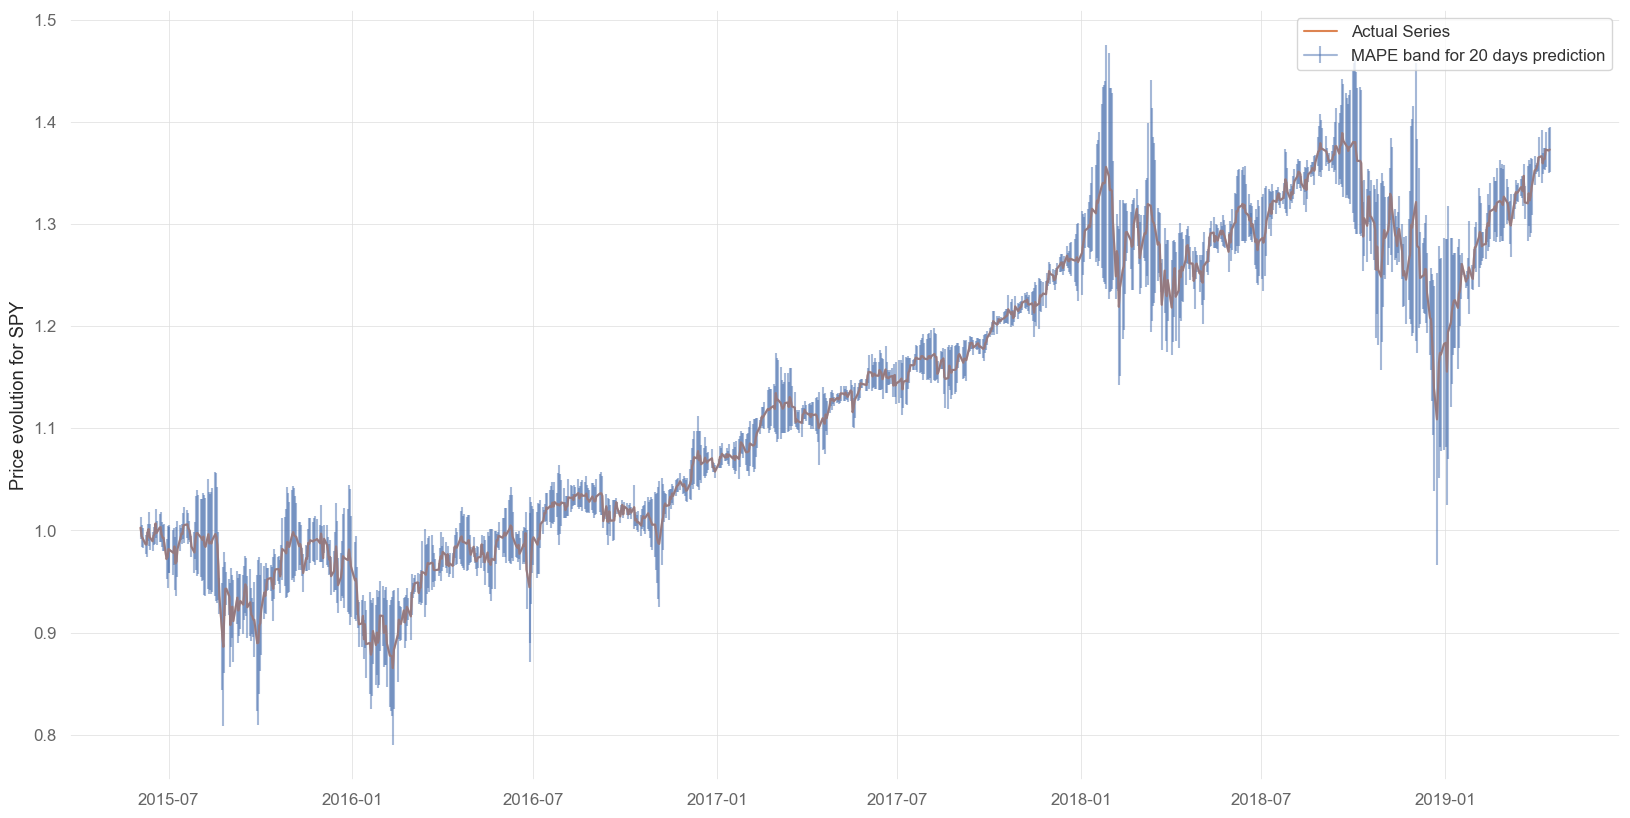

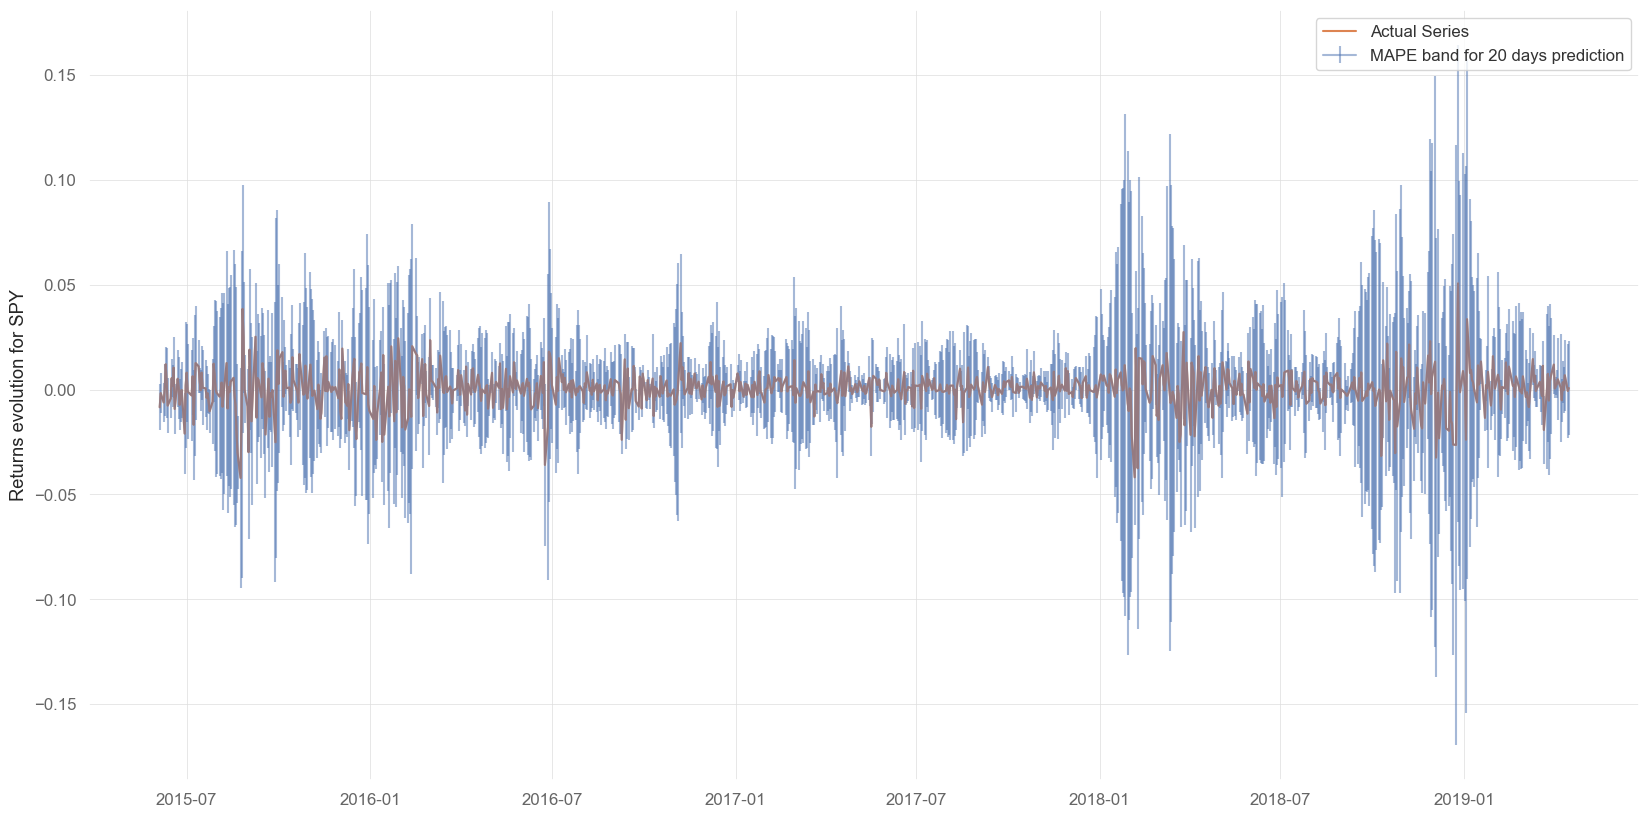

In [238]:
plt.figure(figsize=(20, 10))
y = (1 + df_train["SPY"].iloc[i_predict_min : i_predict_max + 1]).cumprod()
x = y.index
plt.errorbar(x, y, yerr=df_pred_errors["SPY"].values * y, alpha=0.5)
plt.plot(y)
plt.ylabel("Price evolution for SPY")
plt.legend(["Actual Series", f"MAPE band for {w_size} days prediction"])
plt.show()

plt.figure(figsize=(20, 10))
plt.errorbar(
    x, y / y.shift(1) - 1, yerr=np.abs(df_pred_errors["SPY"].values * y), alpha=0.5
)
plt.plot(y / y.shift(1) - 1)
plt.ylabel("Returns evolution for SPY")
plt.legend(["Actual Series", f"MAPE band for {w_size} days prediction"])
plt.show()

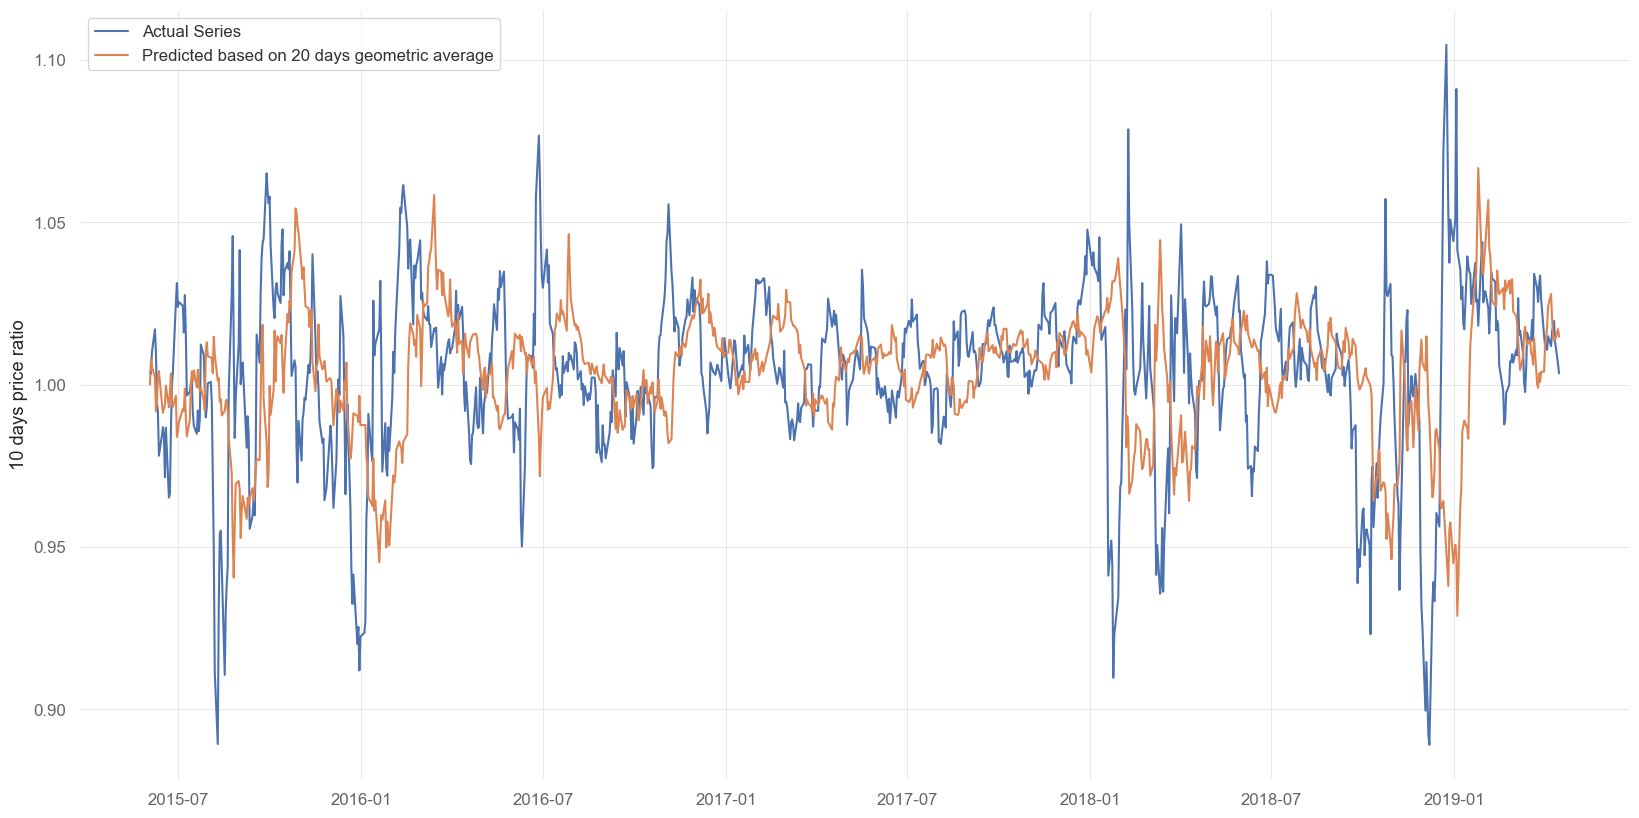

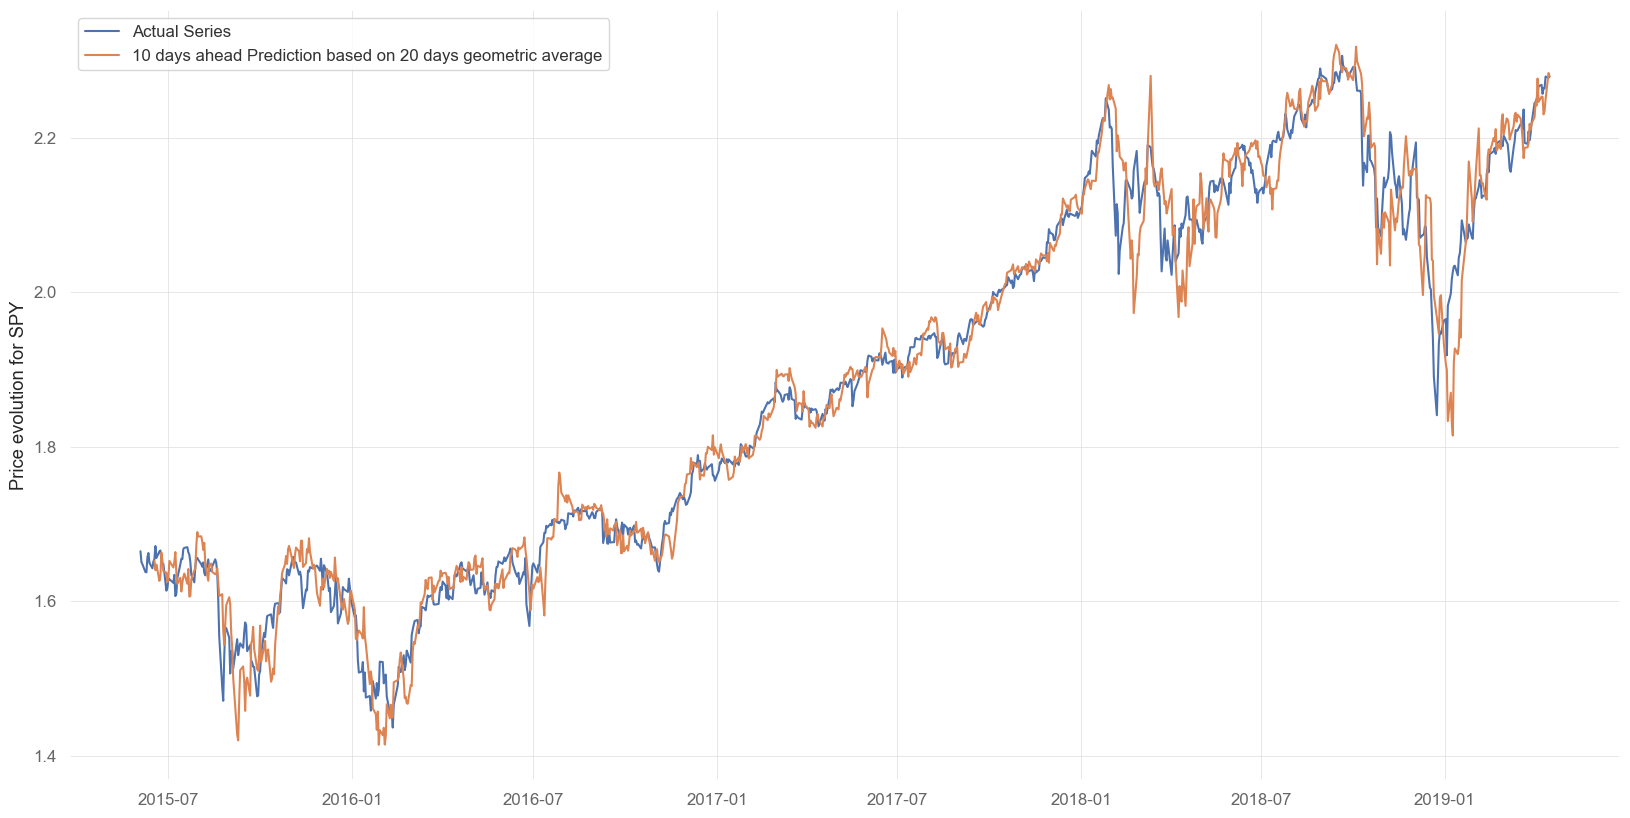

In [242]:
plt.figure(figsize=(20, 10))
npred = 10
df_preds_n = pd.DataFrame(
    predictions[:, :, npred],
    columns=df_train.columns,
    index=df_train.index[i_predict_min : i_predict_max + 1],
)
df_actuals_n = pd.DataFrame(
    actuals[:, :, npred],
    columns=df_train.columns,
    index=df_train.index[i_predict_min : i_predict_max + 1],
)
y = df_train_cumulative["SPY"].iloc[i_predict_min : i_predict_max + 1]
y2 = y * df_preds_n["SPY"] / df_actuals_n["SPY"]
x = y.index
plt.plot(df_actuals_n["SPY"])
plt.plot(df_preds_n["SPY"])
plt.ylabel(f"{npred} days price ratio")
plt.legend(["Actual Series", f"Predicted based on {w_size} days geometric average"])
plt.show()
plt.figure(figsize=(20, 10))
plt.plot(df_train_cumulative["SPY"].iloc[i_predict_min : i_predict_max + 1])
plt.plot(
    df_train_cumulative["SPY"].iloc[i_predict_min : i_predict_max + 1].shift(npred)
    * df_preds_n["SPY"]
)
plt.ylabel("Price evolution for SPY")
plt.legend(
    [
        "Actual Series",
        f"10 days ahead Prediction based on {w_size} days geometric average",
    ]
)
plt.show()